# Chapter 8 : Root Locus Techniques
---

In [1]:
import sys

if (path := "C:/Users/Tom/pycharm-projects/python-control") not in sys.path:
    sys.path.append(path)

import numpy as np

from python_control import (
    s, K, 
    TransferFunction,
    TransferFunctionVector,
    RootLocus,
    get_damping_ratio,
    pole_sensitivity
)
from python_control.design import (
    create_feedback_system,
    create_second_order_system,
    plot_step_responses
)

## 8.3 : Properties of the Root Locus

### Skill-Assessment Exercise 8.2

Given a unity-feedback system that has the forward transfer function
$$
G\left( s \right) = \frac{{K\left( {s + 2} \right)}}{{{s^2} + 4s + 13}}
$$
do the following:
1. Calculate the angle of $G(s)$ at the point $(-3 + j0)$ by finding the algebraic sum of angles of the vectors drawn from the zeros and poles of $G(s)$ to the given point.
2. Determine if the point specified in 1. is on the root locus.
3. If the point specified in 1. is on the root locus, find the gain $K$ using the lengths of the vectors.

In [2]:
G = TransferFunction(K * (s + 2) / (s**2 + 4*s + 13))
tfv = TransferFunctionVector(G)
tfv.point = -3 + 0j

Angle of $G(s)$ at the specified point:

In [3]:
tfv.angle

180.0

As the angle is 180°, the specified point can be a pole of the closed-loop unity-feedback system with the forward transfer function $G(s)$, depending on the value of $K$.

Magnitude of $G(s)$ at the specified point:

In [4]:
tfv.magnitude

0.09999999999999998

The value of $K$ for which the specified point is a pole of the unity-feedback system follows from:

In [5]:
tfv.gain

10.000000000000002

## 8.4 : Sketching the Root Locus

### Example 8.2: Sketching a Root Locus with Asymptotes

Sketch the root locus for the system shown:

![system for example 8.2](./images/example_8-2.png)

In [6]:
KGH = TransferFunction(K * (s + 3) / (s * (s + 1) * (s + 2) * (s + 4)))
KGH.expr

(1.0*K*s + 3.0*K)/(1.0*s**4 + 7.0*s**3 + 14.0*s**2 + 8.0*s)

In [7]:
KGH.poles

[(-4+0j), (-2+0j), (-1+0j), 0j]

In [8]:
KGH.zeros

[(-3+0j)]

In [9]:
root_locus = RootLocus(KGH)
sigma_a, theta_a = root_locus.asymptotes()
sigma_a

(-1.3333333333333333+0j)

In [10]:
np.degrees(theta_a)

array([ 60., 180., 300.])

<div>
<img src="./images/example_8-2b.png" alt="root locus and asymptotes for example 8.2" width="600"/>
</div>

## 8.5 : Refining the Sketch

### Example 8.4 : Breakaway and Break-in Points without Differentiation

Find the breakaway and break-in points for the root locus of this figure:

<div>
<img src="./images/example_8-4.png" alt="root locus and asymptotes for example 8.4" width="500"/>
</div>

In [11]:
KGH = TransferFunction((K * (s - 3) * (s - 5)) / ((s + 1) * (s + 2)))
KGH.expr

(1.0*K*s**2 - 8.0*K*s + 15.0*K)/(1.0*s**2 + 3.0*s + 2.0)

In [12]:
KGH.poles

[(-2+0j), (-1+0j)]

In [13]:
KGH.zeros

[(3+0j), (5+0j)]

In [14]:
root_locus = RootLocus(KGH)
sol = root_locus.find_breakaway_break_in_points()
sol

([-1.45297759021626], [3.81661395385263])

A breakaway point lies on the real axis between two poles. A break-in point lies on the real axis between two zeros.

### Example 8.5 : Frequency and Gain at Imaginary-Axis Crossing

For the system of example 8.2, find the frequency and gain $K$ for which the root locus crosses the imaginary axis. For what range of $K$ is the system stable?

In [15]:
KGH = TransferFunction(K * (s + 3) / (s * (s + 1) * (s + 2) * (s + 4)))
KGH.expr

(1.0*K*s + 3.0*K)/(1.0*s**4 + 7.0*s**3 + 14.0*s**2 + 8.0*s)

In [16]:
root_locus = RootLocus(KGH)
jw_crossings = root_locus.find_jw_crossings(3j)
jw_crossings

(1.5877018893344383j, -1.5877018893344383j)

In [17]:
vector_KGH = TransferFunctionVector(KGH)
vector_KGH.point = jw_crossings[0]
vector_KGH.gain

9.645581025773023

In [18]:
vector_KGH.point = jw_crossings[1]
vector_KGH.gain

9.645581025773023

### Example 8.6 : Angle of Departure from a Complex Pole

Find the angle of departure from the complex poles and sketch the root locus for the unity-feedback system:

![unity-feedback system with complex poles](./images/example_8-6.png)

In [19]:
KGH = TransferFunction(K * (s + 2) / ((s + 3) * (s**2 + 2*s + 2)))
root_locus = RootLocus(KGH)
departure_angles = root_locus.find_angles_of_departure()
departure_angles

[((-1+1j), 108.43494882292202), ((-1-1j), 251.56505117707798)]

### Skill-Assessment Exercise 8.4

Given a unity-feedback system that has the forward transfer function
$$
G\left( s \right) = \frac{{K\left( {s + 2} \right)}}{{{s^2} - 4s + 13}}
$$
do the following:
1. Sketch the root locus.
2. Find the imaginary-axis crossing.
3. Find the gain $K$ at the $j\omega$-axis crossing.
4. Find the break-in point
5. Find the angle of departure from the complex poles.

**Define the forward transfer function** $G(s)$ **and create the** `RootLocus` **object**

In [20]:
G = TransferFunction(K * (s + 2) / (s**2 - 4*s + 13))
root_locus = RootLocus(G)

**Sketch the root locus**

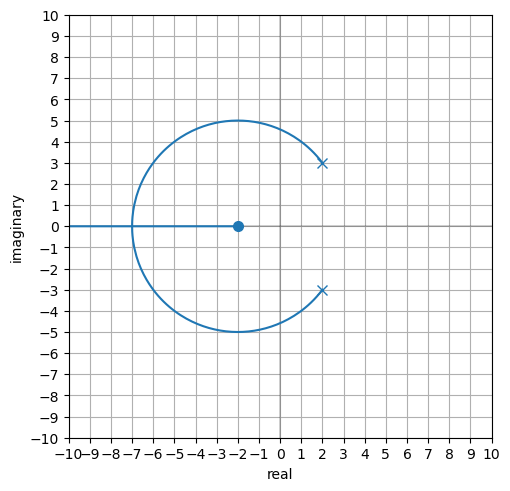

In [21]:
root_locus.plot()

**Get the open-loop poles and open-loop zeros**

In [22]:
G.poles

[(2-3j), (2+3j)]

In [23]:
G.zeros

[(-2+0j)]

**Get the $j\omega$-crossings**

In [24]:
jw_crossings = root_locus.find_jw_crossings(5j)
jw_crossings

(4.582575694955841j, -4.582575694955841j)

**Get the gain at the $j\omega$-crossing**

In [25]:
tfv = TransferFunctionVector(G)
tfv.point = jw_crossings[0]
tfv.gain

4.0

**Find break-in and breakaway points**

In [26]:
breakaway_points, break_in_points = root_locus.find_breakaway_break_in_points()
if breakaway_points:
    print(f"breakaway points = {breakaway_points}")
if break_in_points:
    print(f"break-in points = {break_in_points}")

break-in points = [-7.00000000000000]


**Find angles of departure at open-loop complex poles**

In [27]:
angles_of_departure = root_locus.find_angles_of_departure()
angles_of_departure

[((2-3j), 233.13010235415598), ((2+3j), 126.86989764584402)]

**Find angles of arrival at open-loop complex zeros**

In [28]:
angles_of_arrival = root_locus.find_angles_of_arrival()
angles_of_arrival

[]

## 8.6 : An Example

### Example 8.7 : Sketching a Root Locus and Finding Critical Points

Sketch the root locus for the unity-feedback system with forward transfer function:
$$
G\left( s \right) = \frac{{K\left( {{s^2} - 4s + 20} \right)}}{{\left( {s + 2} \right)\left( {s + 4} \right)}}
$$
and find the following:
1. The exact point and gain where the locus crosses the 0.45 damping ratio line.
2. The exact point and gain where the locus crosses the $j\omega$-axis.
3. The breakaway point on the real axis.
4. The range of $K$ within which the system is stable.

**Define the forward transfer function** $G(s)$ **and create the** `RootLocus` **object**

In [29]:
G = TransferFunction(K * (s**2 - 4*s + 20) / ((s + 2) * (s + 4)))
root_locus = RootLocus(G)

**Sketch the root locus**

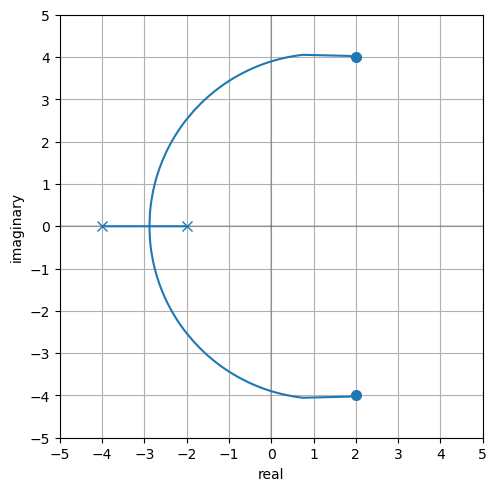

In [30]:
root_locus.plot(real_limits=(-5, 5, 1), imag_limits=(-5, 5, 1))

**The exact point and gain where the locus crosses the 0.45 damping ratio line**

In [31]:
zeta_crossings = root_locus.find_damping_ratio_crossings(damping_ratio=0.45, r_max=5.0)
if zeta_crossings:
    for zc in zeta_crossings:
        print(zc)
else:
    print("no crossings with the damping ratio line found")

((-1.5281716461145145+3.0326687041839584j), 0.41716461145147843)


**The exact point and gain where the locus crosses the $j\omega$-axis**

In [32]:
jw_crossings = root_locus.find_jw_crossings(imag_max=5)
jw_crossings

(3.898717737923621j, -3.898717737923621j)

In [33]:
tfv = TransferFunctionVector(G)
tfv.point = jw_crossings[0]
tfv.gain

1.500000000000012

**The breakaway point on the real axis**

In [34]:
breakaway_points, break_in_points = root_locus.find_breakaway_break_in_points()
if breakaway_points:
    print(f"breakaway points = {breakaway_points}")
if break_in_points:
    print(f"break-in points = {break_in_points}")

breakaway points = [-2.87921561087423]


### Skill-Assessment Exercise 8.5

Given a unity-feedback system that has the forward transfer function:
$$G\left( s \right) = \frac{{K\left( {s - 2} \right)\left( {s - 4} \right)}}{{\left( {{s^2} + 6s + 25} \right)}}$$
do the following:
1. Sketch the root locus.
2. Find the imaginary-axis crossing.
3. Find the gain at $j\omega$-axis crossing.
4. Find the break-in point.
5. Find the point where the locus crosses the 0.5 damping ratio line.
6. Find the gain at the point where the locus crosses the 0.5 damping ratio line.
7. Find the range of gain $K$ for which the system is stable.

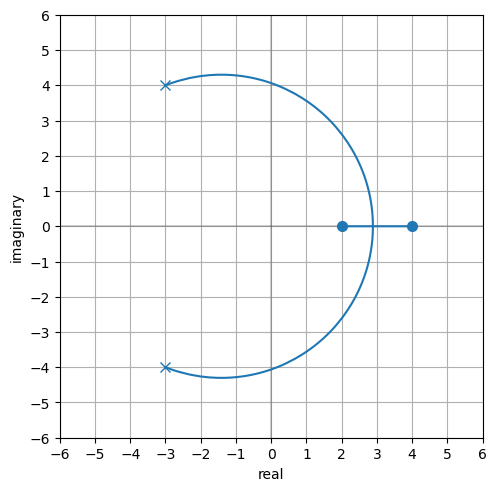

In [35]:
G = TransferFunction(K * (s - 2) * (s - 4) / (s**2 + 6*s + 25))
root_locus = RootLocus(G)
root_locus.plot(real_limits=(-6, 6, 1), imag_limits=(-6, 6, 1))

In [36]:
jw_crossings = root_locus.find_jw_crossings(imag_max=5)
jw_crossings

(4.062019202318045j, -4.062019202318045j)

In [37]:
tfv = TransferFunctionVector(G)
tfv.point = jw_crossings[0]
tfv.gain

0.9999999999999865

In [38]:
breakaway_points, break_in_points = root_locus.find_breakaway_break_in_points()
if breakaway_points:
    print(f"breakaway points = {breakaway_points}")
if break_in_points:
    print(f"break-in points = {break_in_points}")

break-in points = [2.88530316638010]


In [39]:
zeta_crossings = root_locus.find_damping_ratio_crossings(damping_ratio=0.5, r_max=5)
if zeta_crossings:
    for zc in zeta_crossings:
        print(zc)
else:
    print("no crossings with the damping ratio line found")

((-2.415824743986418+4.184331198766554j), 0.10786450515449826)


## 8.7 : Transient Response Design via Gain Adjustment

### Example 8.8 : Third-Order System Gain Design

Consider the unity-feedback system with forward transfer function:
$$G\left( s \right) = \frac{{K\left( {s + 1.5} \right)}}{{s\left( {s + 1} \right)\left( {s + 10} \right)}}$$
Design the value of gain $K$ to yield 1.52% overshoot.

**Sketch the root locus**

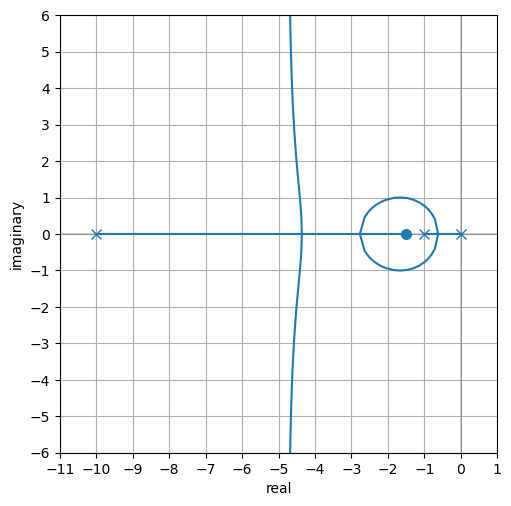

In [40]:
G = TransferFunction(K * (s + 1.5) / (s * (s + 1) * (s + 10)))
root_locus = RootLocus(G)
root_locus.plot(real_limits=(-11, 1, 1), imag_limits=(-6, 6, 1), fig_size=(5, 5))

**Assumption: The feedback system can be approximated by a second-order, underdamped system without any zeros**

Get the damping ratio corresponding with a 1.52% overshoot.

In [41]:
zeta = get_damping_ratio(1.52)
zeta

0.7998396910782286

Find the points on the damping ratio line where the root locus is crossing (i.e. where the feedback system may have closed-loop poles depending on the value of the gain $K$). 

In [42]:
zeta_crossings = root_locus.find_damping_ratio_crossings(zeta, r_max=10)
if zeta_crossings:
    for zc in zeta_crossings:
        print(f"- closed-loop pole at {zc[0]} with gain K = {zc[1]:.3f}")
else:
    print("no crossings with the damping ratio line found")

- closed-loop pole at (-0.8733060865260706+0.6553441531333636j) with gain K = 7.354
- closed-loop pole at (-1.1938398679993987+0.8958783058333311j) with gain K = 12.791
- closed-loop pole at (-4.602084639746876+3.453484760286213j) with gain K = 39.635


Note that each closed-loop pole in the positive upper-half of the complex plane, also has a conjugate pole in the negative lower-half. 

Now, we can create the second-order system approximations as well as the actual unity-feedback systems.

In [43]:
feedback_systems = [
    (zeta_crossing[1], create_feedback_system(zeta_crossing[1], G))
    for zeta_crossing in zeta_crossings
]

second_order_systems = [
    (zeta_crossing[1], create_second_order_system(zeta_crossing[0], zeta))
    for zeta_crossing in zeta_crossings
]

*Closed-loop poles (and zeros) of the second-order systems:*

In [44]:
for sos in second_order_systems:
    print(f"gain K = {sos[0]:.3f}: poles = {sos[1].poles}; zeros = {sos[1].zeros}")

gain K = 7.354: poles = [(-0.87330608652607+0.6553441531333671j), (-0.87330608652607-0.6553441531333671j)]; zeros = []
gain K = 12.791: poles = [(-1.1938398679994+0.8958783058333286j), (-1.1938398679994-0.8958783058333286j)]; zeros = []
gain K = 39.635: poles = [(-4.602084639746875+3.45348476028622j), (-4.602084639746875-3.45348476028622j)]; zeros = []


*Closed-loop poles (and zeros) of the unity-feedback systems:*

In [45]:
for fbs in feedback_systems:
    print(f"gain K = {fbs[0]:.3f}: poles = {fbs[1].closed_loop.poles}; zeros = {fbs[1].closed_loop.zeros}")

gain K = 7.354: poles = [(-9.253387826947876+0j), (-0.873306086526069+0.6553441531333659j), (-0.873306086526069-0.6553441531333659j)]; zeros = [-1.5+0.j]
gain K = 12.791: poles = [(-8.61232026400121+0j), (-1.1938398679993976+0.8958783058333344j), (-1.1938398679993976-0.8958783058333344j)]; zeros = [-1.5+0.j]
gain K = 39.635: poles = [(-4.602084639746881+3.4534847602862184j), (-4.602084639746881-3.4534847602862184j), (-1.7958307205062412+0j)]; zeros = [-1.5+0.j]


Let's compare the unit step response of each unity-feedback system with its corresponding second-order system approximation: 

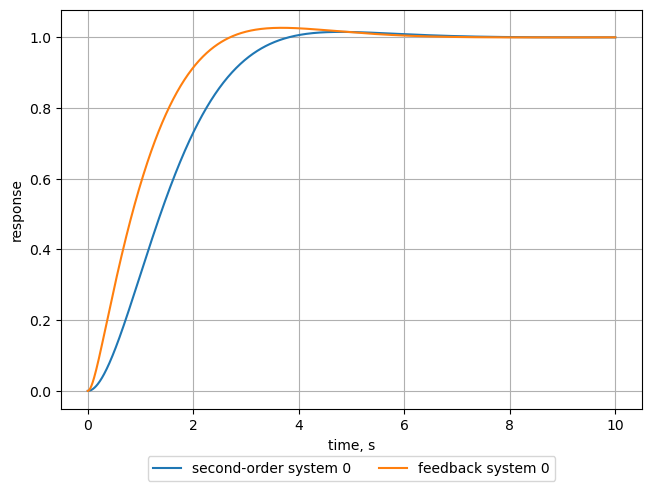

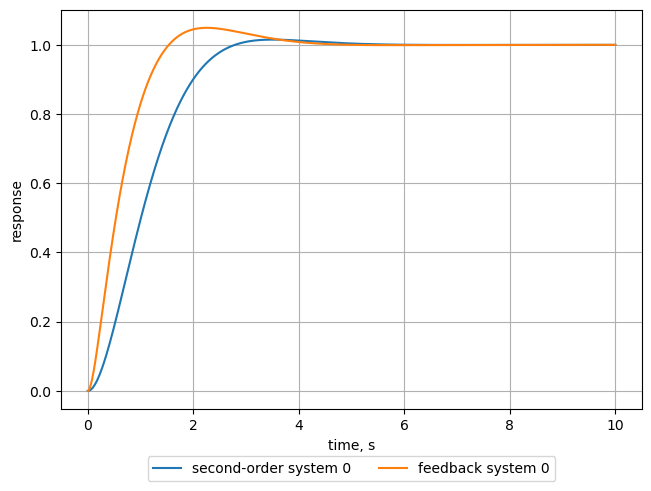

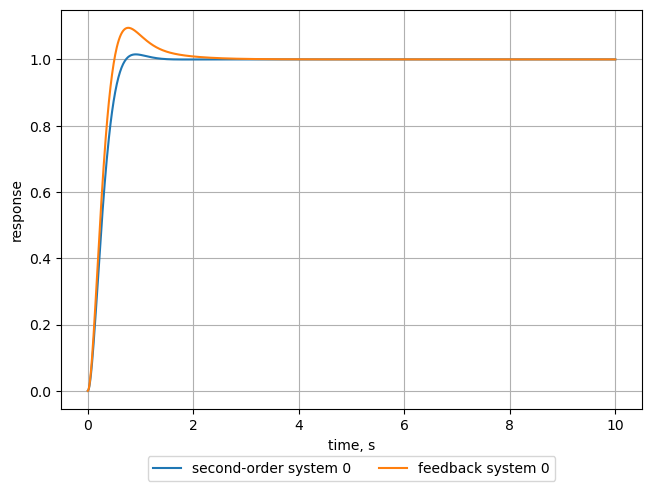

In [46]:
for fbs, sos in zip(feedback_systems, second_order_systems):
    plot_step_responses(fbs[0], fbs[1], sos[1])

## 8.10 : Pole Sensitivity

### Example 8.10 : Root Sensitivity of a Closed-Loop System to Gain Variations

Find the root sensitivity of the unity-feedback system with closed-loop transfer function:
$$
T\left( s \right) = \frac{K}{{{s^2} + 10s + K}}
$$
at $s$ = -9.47 ($K$ = 5) and at $s$ = -5 + j5 ($K$ = 50). Also calculate the change in pole location for 10% change in $K$.

In [47]:
T = TransferFunction(K / (s**2 + 10*s + K))
dK_fraction = 0.1

**Pole 1**

In [48]:
pole1, K_value1 = -9.47, 5.0
S1 = pole_sensitivity(T, pole1, K_value1)
S1

(-0.059058512812153754+0j)

In [49]:
delta_s1 = pole1 * S1 * dK_fraction
delta_s1

(0.05592841163310961+0j)

The pole will move to the right by 0.056 units for a 10% change in $K$.

**Pole 2**

In [50]:
pole2, K_value2 = -5 + 5j, 50.0
S2 = pole_sensitivity(T, pole=pole2, K_value=K_value2)
S2

(0.5-0.5j)

In [51]:
delta_s2 = pole2 * S2 * dK_fraction
delta_s2

0.5j

The pole will move vertically by 0.5 unit for a 10% change in $K$.